In [48]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show, show_hist
from scipy.interpolate import make_interp_spline



In [37]:
# 导入数据集
img_path = "./data/frt00016438_07_su164j_mtr3.img"

dataset = rasterio.open(img_path)
img_data = dataset.read()

# 获取元数据
profile = dataset.profile
print(profile)

# information
print("Width:", dataset.width)
print("Height:", dataset.height)
print("Count (bands):", dataset.count)
print("CRS:", dataset.crs)
print(f"Tags: {dataset.tags()}")


{'driver': 'ENVI', 'dtype': 'float32', 'nodata': 65535.0, 'width': 736, 'height': 675, 'count': 60, 'crs': CRS.from_wkt('PROJCS["MRO Mars Equirectangular [IAU 2000] [-20.00N; 0.00E]",GEOGCS["GCS_Mars_2000_IAU_IAG_custom_sphere_lat20",DATUM["D_Mars_2000_IAU_IAG_custom_sphere_lat20",SPHEROID["Mars_2000_IAU_IAG_custom_sphere_lat20",3393833.26075839,0]],PRIMEM["Reference_Meridian",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Equirectangular"],PARAMETER["standard_parallel_1",-20],PARAMETER["central_meridian",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'), 'transform': Affine(18.0, -0.0, 1517858.4,
       -0.0, -18.0, -1373870.9), 'blockxsize': 736, 'blockysize': 1, 'tiled': False, 'interleave': 'band'}
Width: 736
Height: 675
Count (bands): 60
CRS: PROJCS["MRO Mars Equirectangular [IAU 2000] [-20.00N; 0.00E]",GEOGCS["GCS_Mars_2000_IAU_IAG_custom_sphere_lat20",DATUM["D_Mars_2000_IAU_IAG

第一个波段形状: (675, 736)
最小值: 0.08310713
最大值: 0.29907113
均值: 0.19962706


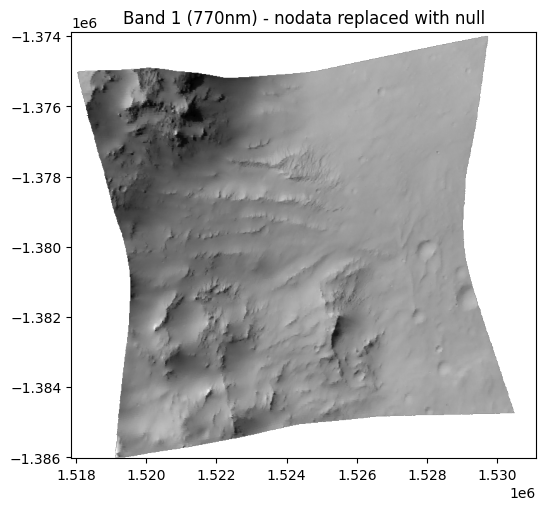

In [34]:
# 读取第一个波段
band1 = dataset.read(1)
band1[band1 == 65535] = np.nan

# information
print("第一个波段形状:", band1.shape)
print("最小值:", np.nanmin(band1))
print("最大值:", np.nanmax(band1))
print("均值:", np.nanmean(band1))

# 可视化
fig, ax = plt.subplots(figsize=(6, 6))
show(band1, transform=dataset.transform, cmap='gray', ax=ax)
ax.set_title("Band 1 (770nm) - nodata replaced with null")
plt.show()


数据形状: (60, 675, 736)
像元(300,300)的光谱数据:
[ 1.94243312e-01  4.61997890e+00  2.40541041e-01  1.87364221e-01
  2.68964767e-02 -1.07738853e-01 -1.87189579e-02  6.98995590e-03
  0.00000000e+00  2.09597945e-01  4.20442000e-02  1.05824995e+00
  1.03798648e-02 -2.43416429e-02  1.86314836e-01 -1.76068544e-02
  5.43785095e-03 -7.63329258e-03  8.44789948e-03  1.04409205e-02
 -4.72915173e-03 -4.41157818e-03 -1.07479095e-03 -3.33321095e-03
  3.22932005e-03 -7.05504417e-03 -1.19562149e-02  1.00190437e-03
  9.41938162e-03 -1.76143646e-03  1.39898062e-03 -2.87640095e-03
 -2.75504589e-03 -1.32548809e-03 -9.20295715e-05 -1.29628181e-03
 -2.27451324e-03  1.47354603e-03  7.21216202e-04  4.96983528e-04
  1.86860561e-03 -1.10852718e-03 -2.41033034e-03 -6.16371632e-03
 -1.11389160e-03 -6.16371632e-03  7.44270027e-01  1.42438769e-01
 -1.32637024e-02  3.71566415e-02  1.71913266e-01  4.85706329e-03
  9.74781513e-01  1.24851167e+00  7.63534978e-02  1.47822991e-01
  1.83322221e-01  1.86303213e-01  1.75476715e-01  1

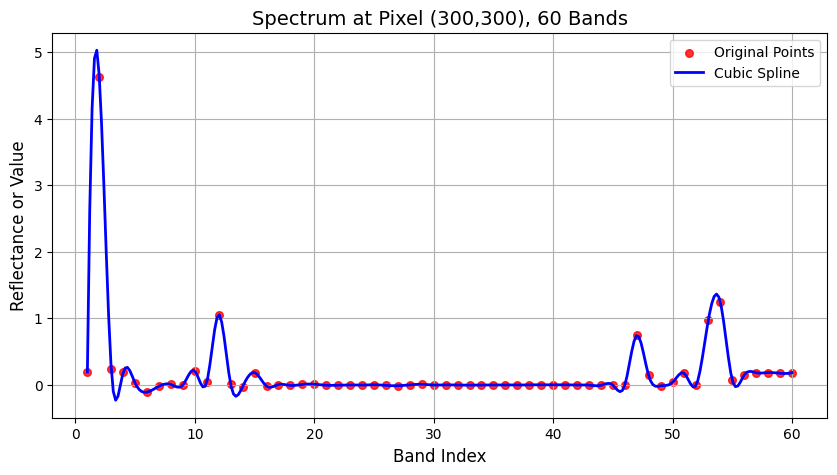

In [49]:
# 打开数据集并读取所有波段
data = dataset.read()
print("数据形状:", data.shape)
    
# 指定像元坐标 (300, 300)
row, col = 300, 300
# 提取该像元在所有波段的值，数组长度为60
pixel_spectrum = data[:, row, col]
    
# 如果 nodata 值为 65535，将其替换为 np.nan
pixel_spectrum = np.where(pixel_spectrum == 65535, np.nan, pixel_spectrum)
    
print(f"像元({row},{col})的光谱数据:")
print(pixel_spectrum)

# 绘制光谱曲线：x轴为波段索引（1~60），y轴为光谱值
# Create x array for band index
x = np.arange(1, len(pixel_spectrum)+1)  # 1..60

# Mask out NaN if needed
mask = ~np.isnan(pixel_spectrum)
x_valid = x[mask]
y_valid = pixel_spectrum[mask]

# Spline interpolation for smoothing
x_smooth = np.linspace(x_valid.min(), x_valid.max(), 300)  # 300 points
spl = make_interp_spline(x_valid, y_valid, k=3)  # cubic spline
y_smooth = spl(x_smooth)

# Plot original data (scatter) and smoothed curve
plt.figure(figsize=(10, 5))

# Original points
plt.scatter(x_valid, y_valid, color='red', s=30, alpha=0.8, label='Original Points')

# Smoothed curve
plt.plot(x_smooth, y_smooth, color='blue', linewidth=2, label='Cubic Spline')

plt.xlabel("Band Index", fontsize=12)
plt.ylabel("Reflectance or Value", fontsize=12)
plt.title(f"Spectrum at Pixel ({row},{col}), 60 Bands", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()


In [35]:
dataset.close()